In [69]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [70]:
dataset=pd.read_csv('data/train_dataset.csv')


In [71]:
dataset.head()


,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned
0,1,Roger Allers,186,73,28,847,Nathan Lane,2000,422783777,Adventure|Animation|Drama|Family|Musical,Matthew Broderick,The Lion King,644348,6458,Niketa Calame,0,king|prince|scar|uncle|unnecessary guilt,656,English,USA,G,1994,886,17000,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4
1,2,George A. Romero,252,97,0,233,Shawn Roberts,654,20433940,Horror,Tony Nappo,Land of the Dead,78883,1876,Pedro Miguel Arce,8,apocalypse|mercenary|skyscraper|urban setting|...,662,English,Canada,R,2005,529,0,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2
2,3,David Gordon Green,232,117,234,221,Tye Sheridan,12000,371897,Drama,Nicolas Cage,Joe,36494,13607,Ronnie Gene Blevins,2,alcoholic|cigarette smoking|father son relatio...,118,English,USA,R,2013,1000,11000,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2
3,4,John Carpenter,297,109,0,145,Richard Masur,957,13782838,Horror|Mystery|Sci-Fi,Wilford Brimley,The Thing,258078,1757,David Clennon,0,alien creature|alien life form|antarctica|isol...,911,English,USA,R,1982,163,23000,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4
4,5,Peter Jackson,297,171,0,857,Orlando Bloom,16000,313837577,Action|Adventure|Drama|Fantasy,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,1238746,22342,Billy Boyd,2,elf|hobbit|middle earth|quest|ring,5060,English,New Zealand,PG-13,2001,5000,21000,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4


In [72]:
dataset.shape


(3004, 27)

In [73]:
# We will find the mean imdb score
mean_imdb_score = dataset['imdb_score_binned'].mean()
print(mean_imdb_score)


2.2503328894806924


/home/taherm/software/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


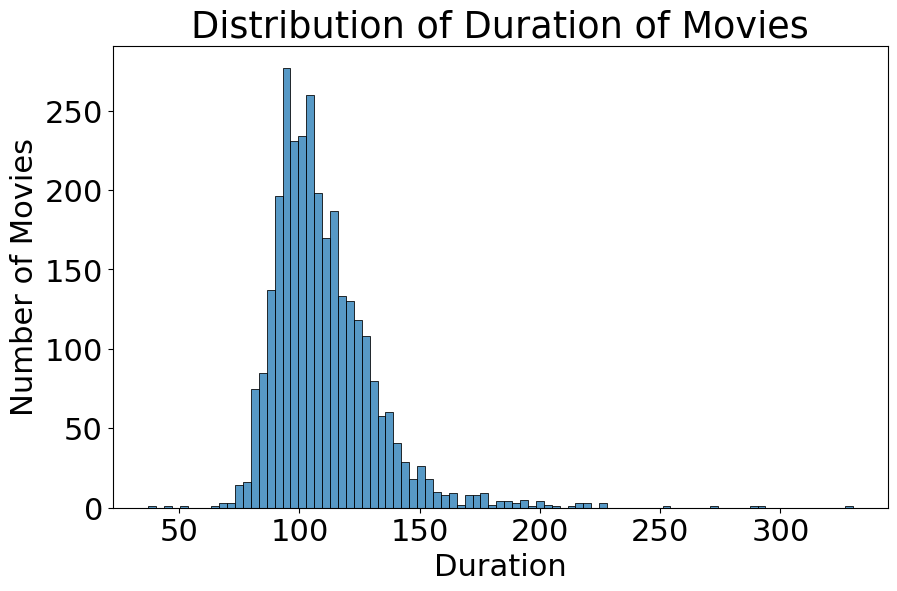

In [74]:
# Looking at the distribution of the duration of the movies
plt.figure(figsize=(10,6))
sns.histplot(dataset['duration'])
plt.title('Distribution of Duration of Movies')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.show()


In [75]:
# We will standardise some of the features. We will use z-score standardisation as it is better for zero mean models.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


/home/taherm/software/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


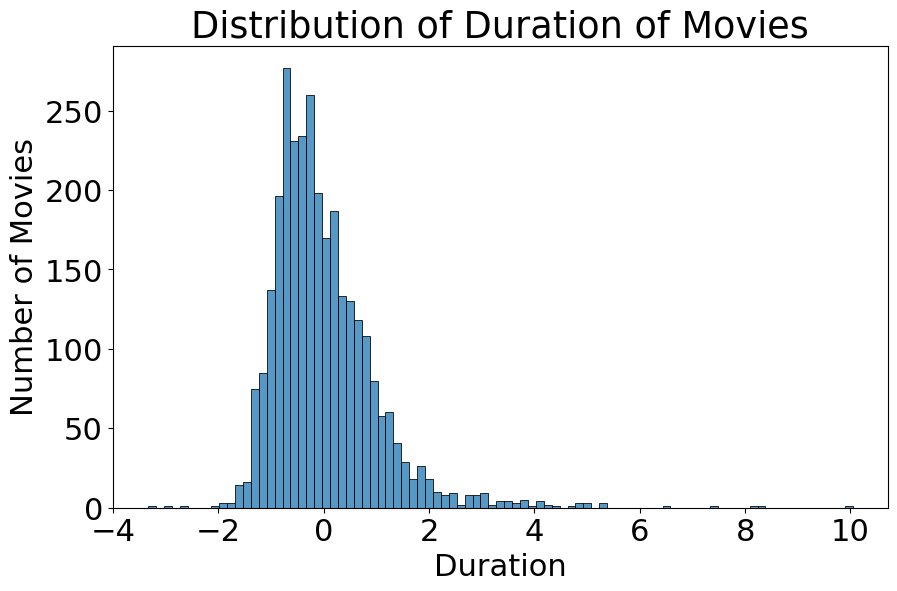

In [76]:
# We will standardise duration of movies
dataset['duration'] = scaler.fit_transform(dataset[['duration']])
# Looking at the distribution of the duration of the movies
plt.figure(figsize=(10,6))
sns.histplot(dataset['duration'])
plt.title('Distribution of Duration of Movies')
plt.xlabel('Duration')
plt.ylabel('Number of Movies')
plt.show()


In [77]:
# We will standardise all the facebook likes, and number of users and critics.
dataset['director_facebook_likes'] = scaler.fit_transform(dataset[['director_facebook_likes']])
dataset['actor_1_facebook_likes'] = scaler.fit_transform(dataset[['actor_1_facebook_likes']])
dataset['actor_2_facebook_likes'] = scaler.fit_transform(dataset[['actor_2_facebook_likes']])
dataset['actor_3_facebook_likes'] = scaler.fit_transform(dataset[['actor_3_facebook_likes']])
dataset['cast_total_facebook_likes'] = scaler.fit_transform(dataset[['cast_total_facebook_likes']])
dataset['movie_facebook_likes'] = scaler.fit_transform(dataset[['movie_facebook_likes']])
dataset['num_critic_for_reviews'] = scaler.fit_transform(dataset[['num_critic_for_reviews']])
dataset['num_user_for_reviews'] = scaler.fit_transform(dataset[['num_user_for_reviews']])
dataset['num_voted_users'] = scaler.fit_transform(dataset[['num_voted_users']])
# We will also standardise the gross budget and face numbers
dataset['gross'] = scaler.fit_transform(dataset[['gross']])
dataset['facenumber_in_poster'] = scaler.fit_transform(dataset[['facenumber_in_poster']])


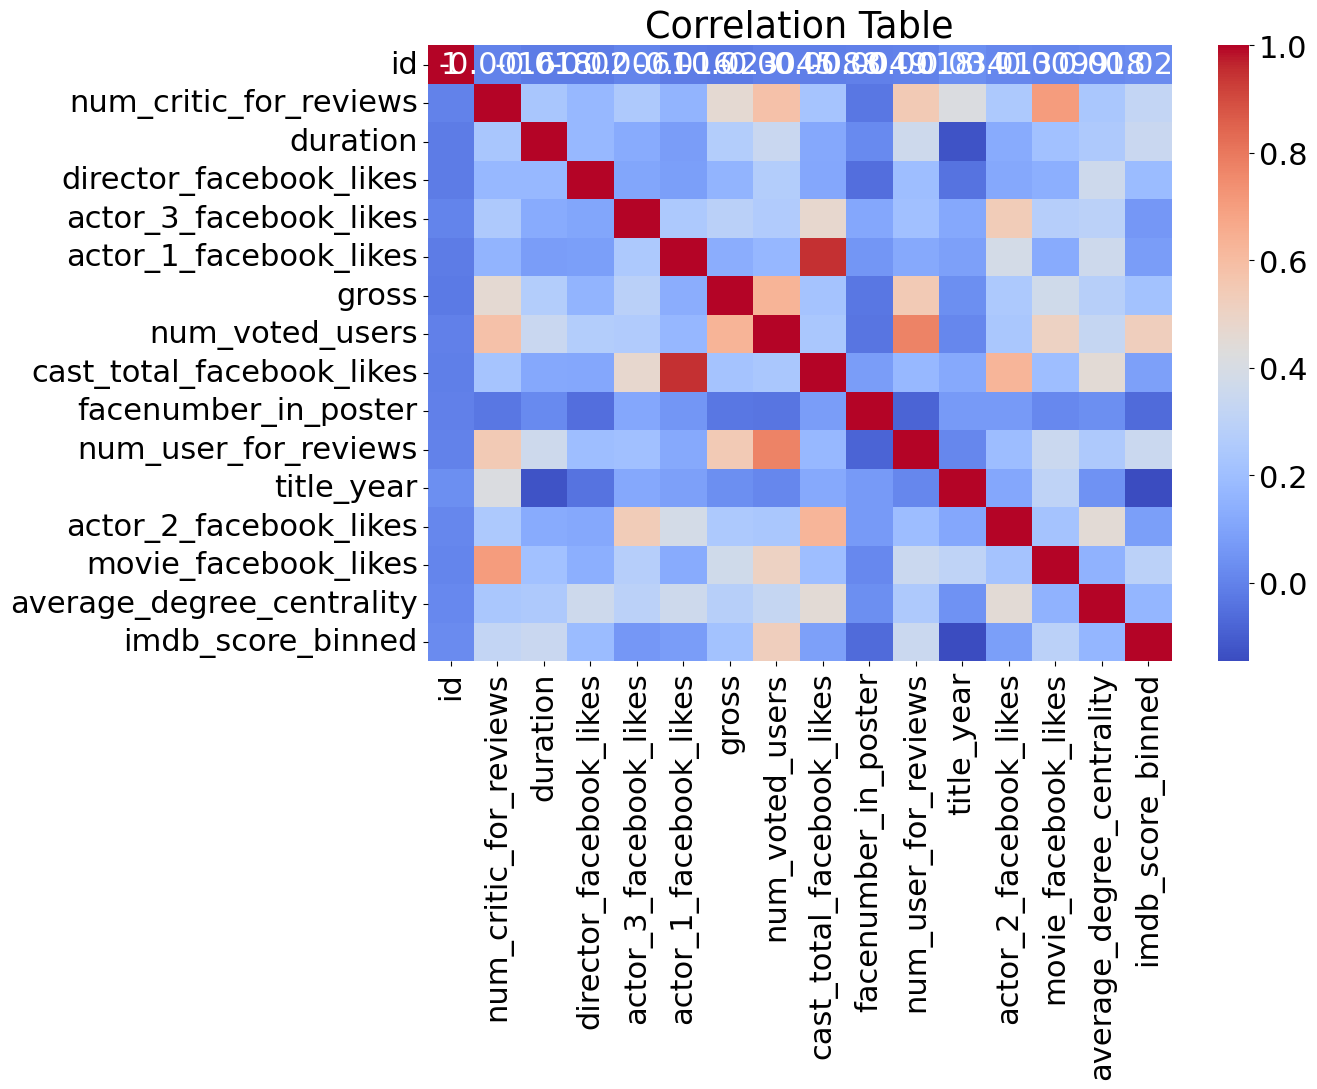

In [78]:
# We will do a correlation table between all the columns.
correlation = dataset.select_dtypes(include='number').corr()
# We will plot the correlation table
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Table')
plt.show()


In [79]:
# Open doc2vec data
doc2vec_plot_data = np.load('data/features_doc2vec/train_doc2vec_features_plot_keywords.npy')
doc2vec_plot_data.shape


(3004, 100)

So this is for vectorizing plot, basically a better bagofwords.
If we want to use the movie's plot as a feature instead of using words we should use this.


In [80]:
# Making a single feature of the doc2vec
(doc2vec_plot_data)

array([[-2.8004851e-03, -4.9558324e-03,  2.1633205e-03, ...,
         2.5023373e-03, -2.4127322e-03, -2.0643599e-04],
       [ 2.1234737e-03,  2.8782903e-04, -3.0201089e-03, ...,
         4.0587303e-03,  2.1117427e-03, -2.3187608e-03],
       [-2.2412431e-03, -5.2519789e-04,  3.6425258e-03, ...,
         3.4802218e-03, -4.8580174e-03,  4.2749899e-03],
       ...,
       [-4.2083617e-03,  2.7473856e-04, -4.8459074e-03, ...,
        -2.1611601e-03, -1.0963453e-03, -1.6493938e-03],
       [-2.9127423e-03, -2.3622466e-03, -5.3009664e-04, ...,
        -3.2842490e-03, -7.6793294e-05, -3.4722677e-03],
       [-2.0651736e-03, -1.9376250e-05,  4.3469663e-03, ...,
        -4.1363826e-03,  1.4107807e-03, -1.7162480e-03]], dtype=float32)

We are assuming that if we have a movie that has a higly related plot point to a film in training dataset then the movie will have a similar score.


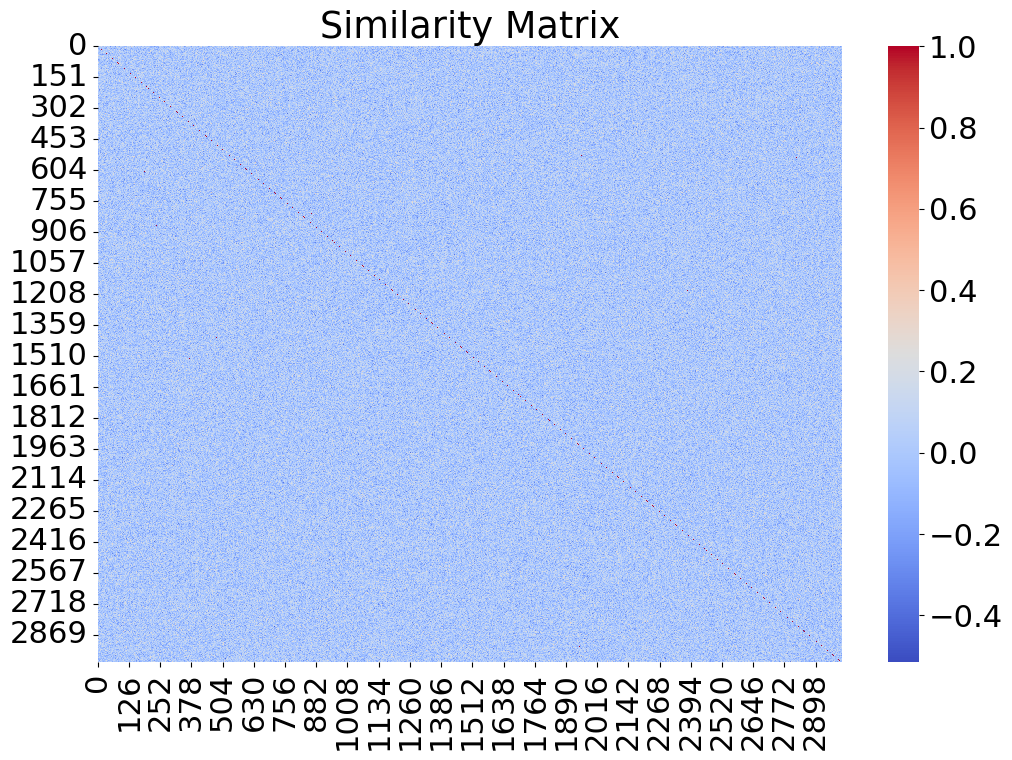

(3004, 3004)

In [81]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

scaler = StandardScaler()
doc2vec_scaled = scaler.fit_transform(doc2vec_plot_data)
# Now we create a similarity matrix using cosine similarity
similarity_matrix = cosine_similarity(doc2vec_scaled)

# Plotting the similarity matrix
plt.figure(figsize=(12,8))
sns.heatmap(similarity_matrix, cmap='coolwarm')
plt.title('Similarity Matrix')
plt.show()

similarity_matrix.shape


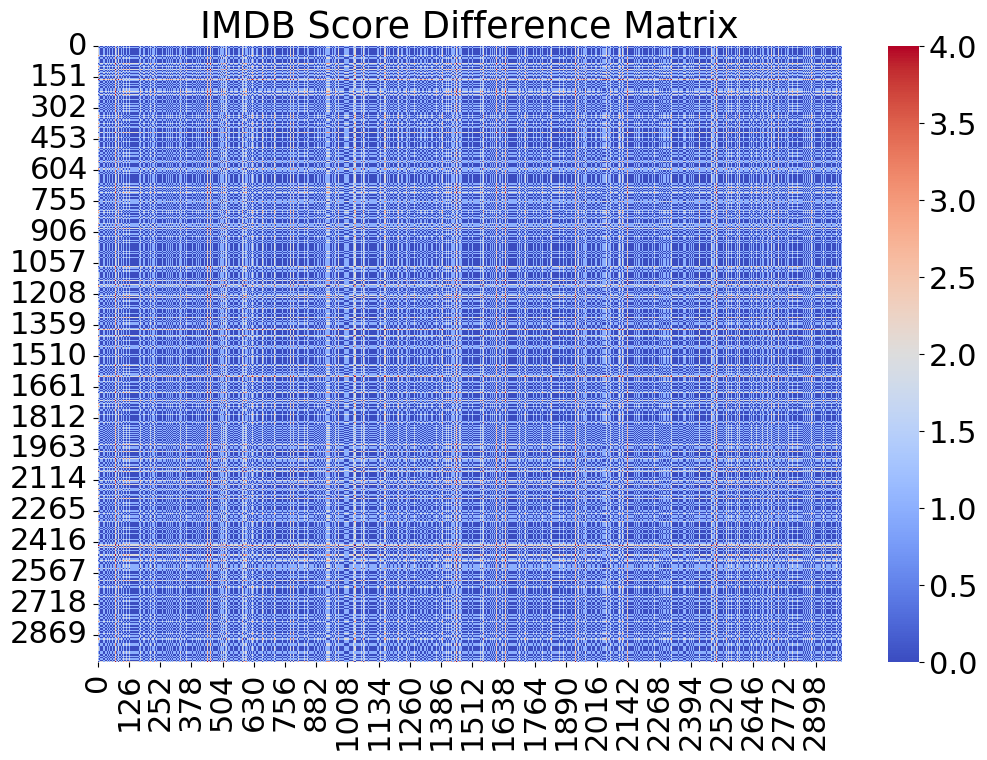

(3004, 3004)

In [82]:
# We will now create a matrix that is a matrix of difference of rating between movies
imdb_score_matrix = np.array(dataset['imdb_score_binned'])
imdb_score_matrix = imdb_score_matrix.reshape(-1,1)
imdb_score_matrix = np.repeat(imdb_score_matrix, len(imdb_score_matrix), axis=1)
imdb_score_matrix = np.abs(imdb_score_matrix - imdb_score_matrix.T)
plt.figure(figsize=(12,8))
sns.heatmap(imdb_score_matrix, cmap='coolwarm')
plt.title('IMDB Score Difference Matrix')
plt.show()
imdb_score_matrix.shape


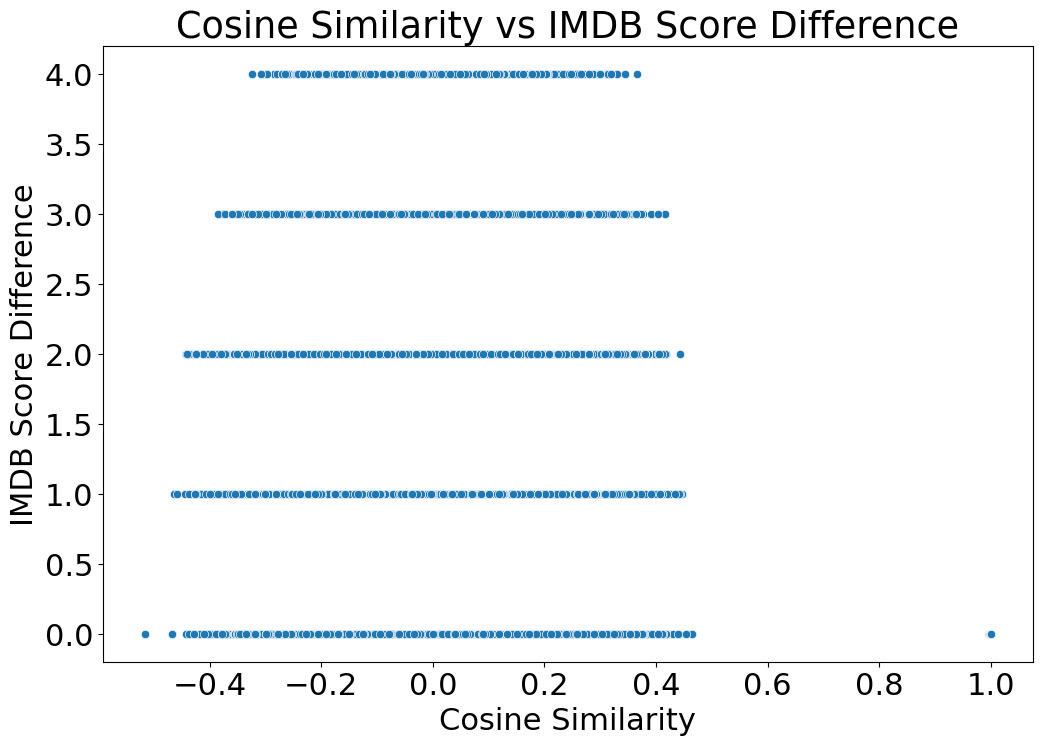

In [83]:
# Now we will scatter plot cosine similarity and imdb score difference
plt.figure(figsize=(12,8))
sns.scatterplot(x=similarity_matrix.flatten(), y=imdb_score_matrix.flatten())
plt.title('Cosine Similarity vs IMDB Score Difference')
plt.xlabel('Cosine Similarity')
plt.ylabel('IMDB Score Difference')
plt.show()


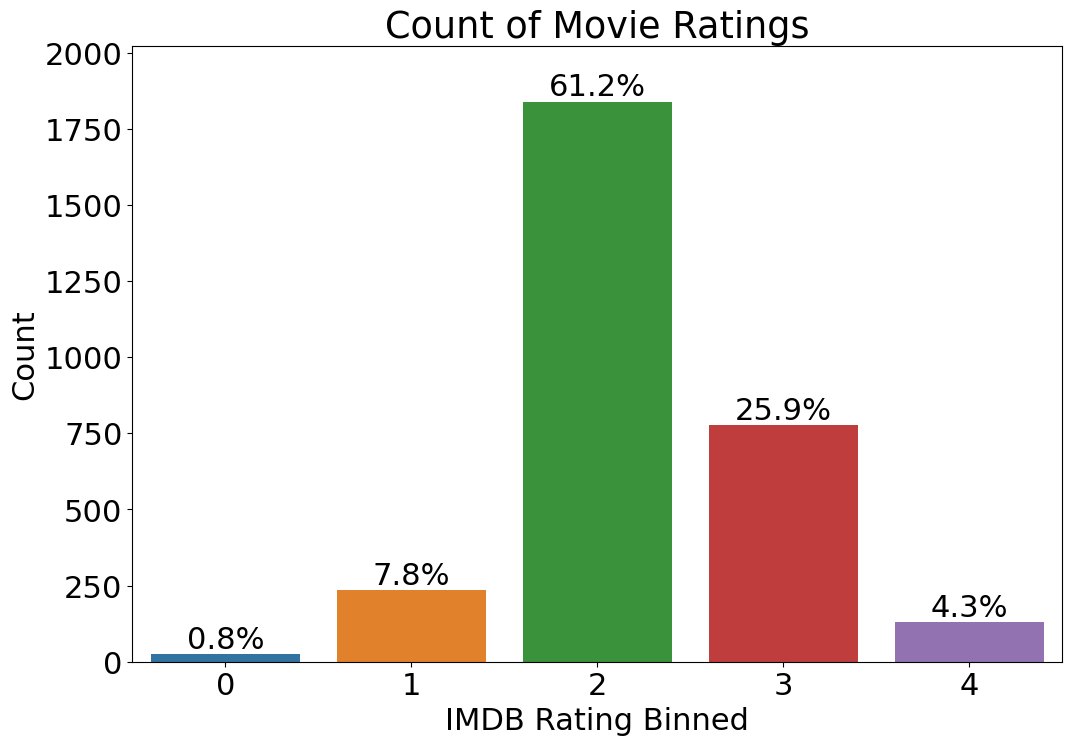

In [84]:
#Making a histogram of count of imdb score
plt.rcParams.update({'font.size': 22})
plt.figure(figsize=(12,8))

ax = sns.countplot(x='imdb_score_binned', data=dataset)
plt.title('Count of Movie Ratings')
plt.xlabel('IMDB Rating Binned')
plt.ylabel('Count')
total = dataset['imdb_score_binned'].count()
ax.bar_label(ax.containers[0], fmt=lambda x: f'{(x/total)*100:0.1f}%')
ax.margins(y=0.1)
plt.show()


In [85]:
# We have a genre column which has multiple genres separated by '|'. We will split these genres into separate columns.
# We will first find all the unique genres
unique_genres = set()
for genre in dataset['genres']:
    genre_list = genre.split('|')
    for g in genre_list:
        unique_genres.add(g)
unique_genres = list(unique_genres)
print(unique_genres)
# Now we split the genres into separate columns
for genre in unique_genres:
    dataset[genre] = dataset['genres'].str.contains(genre).astype(int)
dataset.drop(columns=['genres'], inplace=True)
dataset.head()


['Mystery', 'History', 'Adventure', 'Thriller', 'Biography', 'Film-Noir', 'Drama', 'Action', 'Crime', 'Sport', 'Family', 'Animation', 'Sci-Fi', 'Comedy', 'War', 'Western', 'Musical', 'Horror', 'Music', 'Romance', 'Documentary', 'Fantasy']


,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned,Mystery,History,Adventure,Thriller,Biography,Film-Noir,Drama,Action,Crime,Sport,Family,Animation,Sci-Fi,Comedy,War,Western,Musical,Horror,Music,Romance,Documentary,Fantasy
0,1,Roger Allers,0.168193,-1.692456,-0.251113,0.041616,Nathan Lane,-0.343014,5.423388,Matthew Broderick,The Lion King,3.576467,-0.246173,Niketa Calame,-0.659713,king|prince|scar|uncle|unnecessary guilt,0.770991,English,USA,G,1994,-0.238016,0.404412,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,2,George A. Romero,0.712593,-0.596914,-0.260477,-0.281257,Shawn Roberts,-0.424659,-0.459765,Tony Nappo,Land of the Dead,-0.172501,-0.474800,Pedro Miguel Arce,3.162426,apocalypse|mercenary|skyscraper|urban setting|...,0.785444,English,Canada,R,2005,-0.314785,-0.451986,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,David Gordon Green,0.547624,0.316038,-0.182223,-0.287568,Tye Sheridan,0.263561,-0.753112,Nicolas Cage,Joe,-0.453535,0.110539,Ronnie Gene Blevins,0.295821,alcoholic|cigarette smoking|father son relatio...,-0.524925,English,USA,R,2013,-0.213501,0.102154,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,John Carpenter,1.083775,-0.049143,-0.260477,-0.327532,Richard Masur,-0.406280,-0.557017,Wilford Brimley,The Thing,1.015541,-0.480737,David Clennon,-0.659713,alien creature|alien life form|antarctica|isol...,1.385226,English,USA,R,1982,-0.393489,0.706670,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5,Peter Jackson,1.083775,2.781008,-0.260477,0.046874,Orlando Bloom,0.506190,3.830379,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,7.517258,0.546387,Billy Boyd,0.295821,elf|hobbit|middle earth|quest|ring,11.379196,English,New Zealand,PG-13,2001,0.646659,0.605918,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [86]:
# Since we saw that cast total facebook likes were correlated heavily with actor 1 facebook likes, we will drop actor 1 facebook likes
dataset.drop(columns=['actor_1_facebook_likes'], inplace=True)


In [87]:
dataset.head()


,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,num_user_for_reviews,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned,Mystery,History,Adventure,Thriller,Biography,Film-Noir,Drama,Action,Crime,Sport,Family,Animation,Sci-Fi,Comedy,War,Western,Musical,Horror,Music,Romance,Documentary,Fantasy
0,1,Roger Allers,0.168193,-1.692456,-0.251113,0.041616,Nathan Lane,5.423388,Matthew Broderick,The Lion King,3.576467,-0.246173,Niketa Calame,-0.659713,king|prince|scar|uncle|unnecessary guilt,0.770991,English,USA,G,1994,-0.238016,0.404412,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,2,George A. Romero,0.712593,-0.596914,-0.260477,-0.281257,Shawn Roberts,-0.459765,Tony Nappo,Land of the Dead,-0.172501,-0.474800,Pedro Miguel Arce,3.162426,apocalypse|mercenary|skyscraper|urban setting|...,0.785444,English,Canada,R,2005,-0.314785,-0.451986,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,David Gordon Green,0.547624,0.316038,-0.182223,-0.287568,Tye Sheridan,-0.753112,Nicolas Cage,Joe,-0.453535,0.110539,Ronnie Gene Blevins,0.295821,alcoholic|cigarette smoking|father son relatio...,-0.524925,English,USA,R,2013,-0.213501,0.102154,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,John Carpenter,1.083775,-0.049143,-0.260477,-0.327532,Richard Masur,-0.557017,Wilford Brimley,The Thing,1.015541,-0.480737,David Clennon,-0.659713,alien creature|alien life form|antarctica|isol...,1.385226,English,USA,R,1982,-0.393489,0.706670,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5,Peter Jackson,1.083775,2.781008,-0.260477,0.046874,Orlando Bloom,3.830379,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,7.517258,0.546387,Billy Boyd,0.295821,elf|hobbit|middle earth|quest|ring,11.379196,English,New Zealand,PG-13,2001,0.646659,0.605918,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


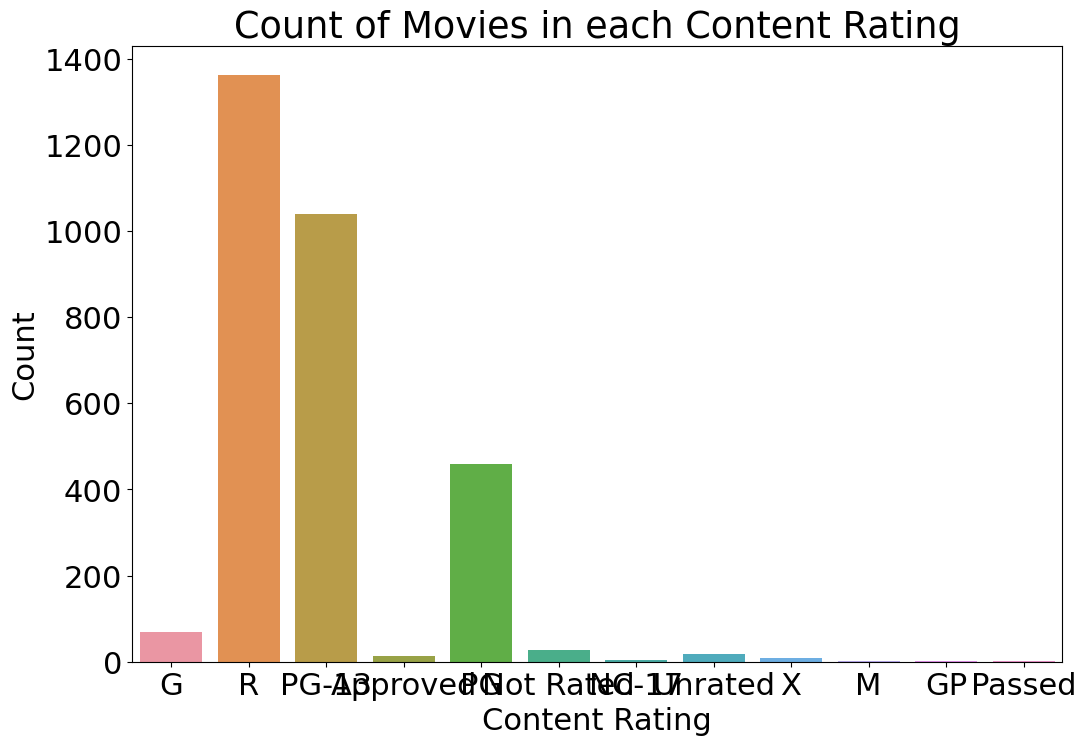

In [88]:
# We will count plot the number of movies in each content_rating
plt.figure(figsize=(12,8))
sns.countplot(x='content_rating', data=dataset)
plt.title('Count of Movies in each Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.show()


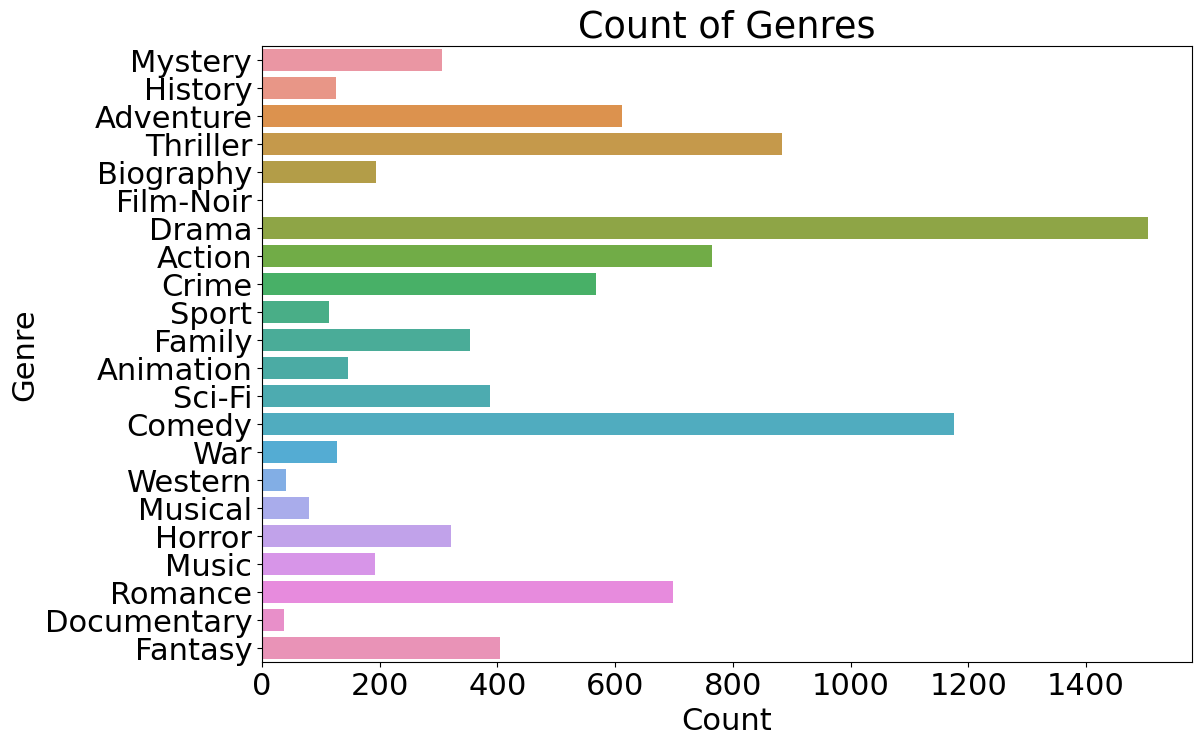

In [89]:
# We will plot the count of each genre
genre_count = dataset[unique_genres].sum()
plt.figure(figsize=(12,8))
sns.barplot(x=genre_count, y=genre_count.index)
plt.title('Count of Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()


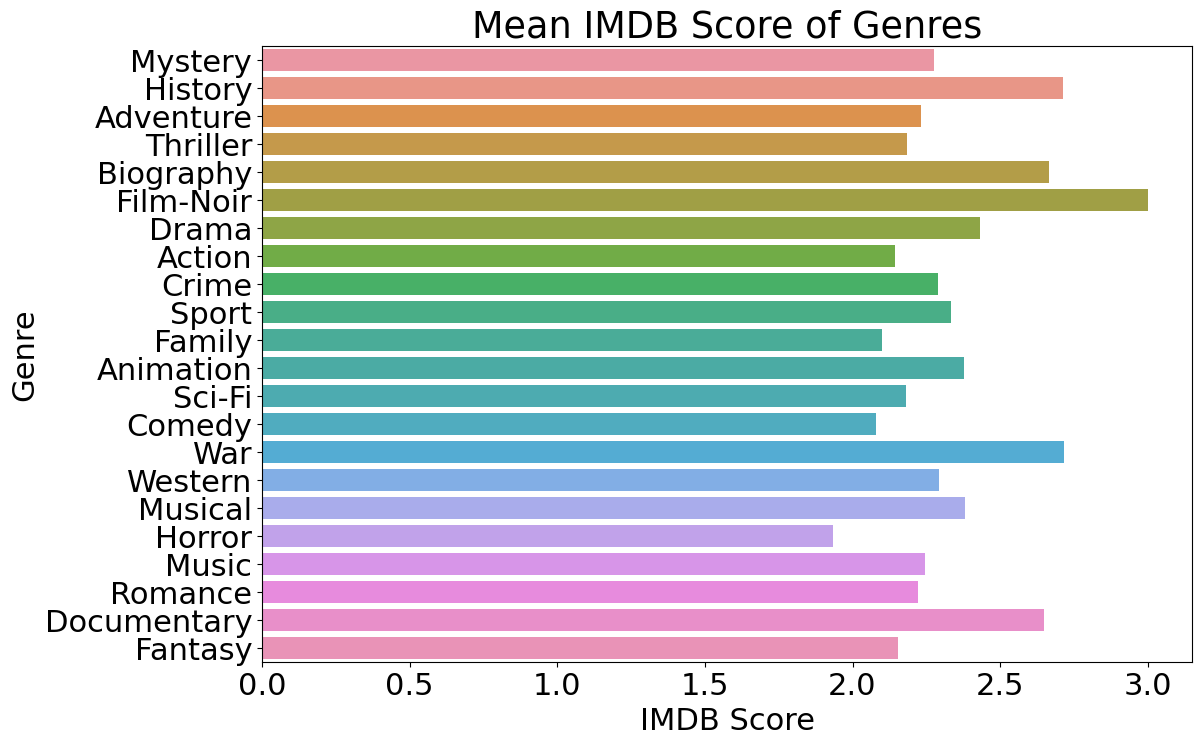

In [90]:
# We will plot the mean score of each genre
# First we calculate mean score of each genre
genre_mean_score = {}
for genre in unique_genres:
    genre_mean_score[genre] = dataset[dataset[genre] == 1]['imdb_score_binned'].mean()
genre_mean_score = pd.Series(genre_mean_score)
plt.figure(figsize=(12,8))
sns.barplot(x=genre_mean_score, y=genre_mean_score.index)
plt.title('Mean IMDB Score of Genres')
plt.xlabel('IMDB Score')
plt.ylabel('Genre')
plt.show()



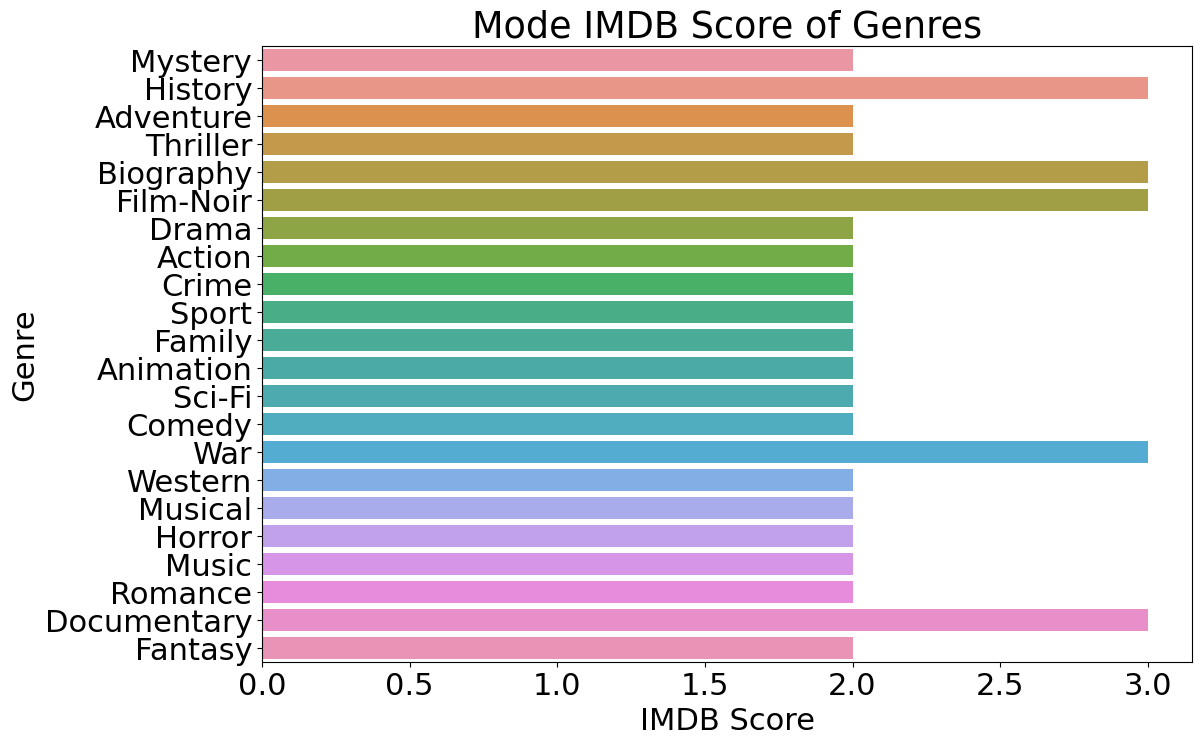

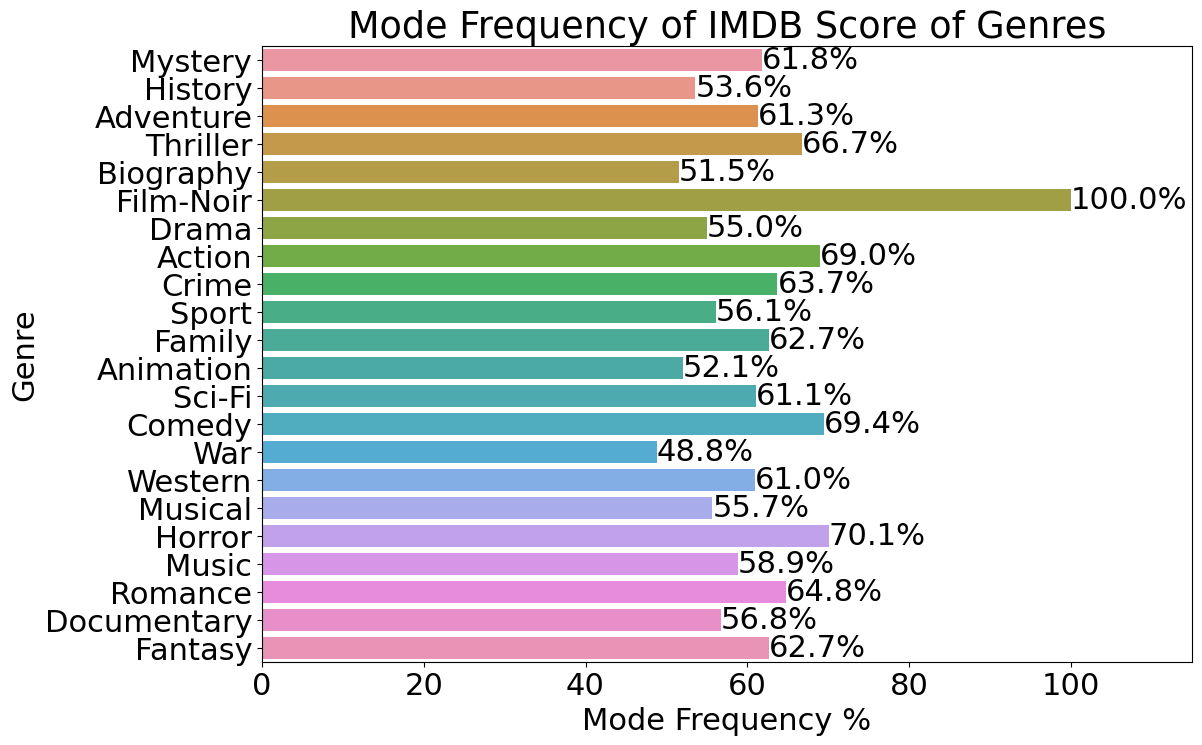

In [91]:
# We will plot the mean score of each genre
# First we calculate mean score of each genre
genre_mode_score = {}
genre_mode_freq = {}

for genre in unique_genres:
    genre_mode_score[genre] = dataset[dataset[genre] == 1]['imdb_score_binned'].mode().to_numpy()[0]
    genre_mode_freq[genre] = dataset[dataset[genre] == 1]['imdb_score_binned'].value_counts(True).to_numpy()[0] * 100

genre_mode_score = pd.Series(genre_mode_score)
genre_mode_freq = pd.Series(genre_mode_freq)

plt.figure(figsize=(12,8))
sns.barplot(x=genre_mode_score, y=genre_mode_score.index)
plt.title('Mode IMDB Score of Genres')
plt.xlabel('IMDB Score')
plt.ylabel('Genre')
plt.show()


plt.figure(figsize=(12,8))
ax = sns.barplot(x=genre_mode_freq, y=genre_mode_freq.index)
plt.title('Mode Frequency of IMDB Score of Genres')
plt.xlabel('Mode Frequency %')
plt.ylabel('Genre')
ax.bar_label(ax.containers[0], fmt = lambda x: f'{x:0.1f}%')
ax.margins(x=0.15)
plt.show()


We can see that Film-Noir has a very high mean score, this is because it is has a low count of movies and the movies are generally good. Thus, this is an outlier and means that we should not use this as a feature. 
For other genres we can see that the mean score is around 3.5 which is the mean of the dataset. This means that this doesnt give a straightforward correlation.


In [92]:
# We can see a correlation between number of user reviews and number of voted users
# So we drop number of user reviews
dataset.drop(columns=['num_user_for_reviews'], inplace=True)
pd.options.display.max_columns = None
dataset.head()


,id,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,gross,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,language,country,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned,Mystery,History,Adventure,Thriller,Biography,Film-Noir,Drama,Action,Crime,Sport,Family,Animation,Sci-Fi,Comedy,War,Western,Musical,Horror,Music,Romance,Documentary,Fantasy
0,1,Roger Allers,0.168193,-1.692456,-0.251113,0.041616,Nathan Lane,5.423388,Matthew Broderick,The Lion King,3.576467,-0.246173,Niketa Calame,-0.659713,king|prince|scar|uncle|unnecessary guilt,English,USA,G,1994,-0.238016,0.404412,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,2,George A. Romero,0.712593,-0.596914,-0.260477,-0.281257,Shawn Roberts,-0.459765,Tony Nappo,Land of the Dead,-0.172501,-0.474800,Pedro Miguel Arce,3.162426,apocalypse|mercenary|skyscraper|urban setting|...,English,Canada,R,2005,-0.314785,-0.451986,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,3,David Gordon Green,0.547624,0.316038,-0.182223,-0.287568,Tye Sheridan,-0.753112,Nicolas Cage,Joe,-0.453535,0.110539,Ronnie Gene Blevins,0.295821,alcoholic|cigarette smoking|father son relatio...,English,USA,R,2013,-0.213501,0.102154,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,John Carpenter,1.083775,-0.049143,-0.260477,-0.327532,Richard Masur,-0.557017,Wilford Brimley,The Thing,1.015541,-0.480737,David Clennon,-0.659713,alien creature|alien life form|antarctica|isol...,English,USA,R,1982,-0.393489,0.706670,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,5,Peter Jackson,1.083775,2.781008,-0.260477,0.046874,Orlando Bloom,3.830379,Christopher Lee,The Lord of the Rings: The Fellowship of the R...,7.517258,0.546387,Billy Boyd,0.295821,elf|hobbit|middle earth|quest|ring,English,New Zealand,PG-13,2001,0.646659,0.605918,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


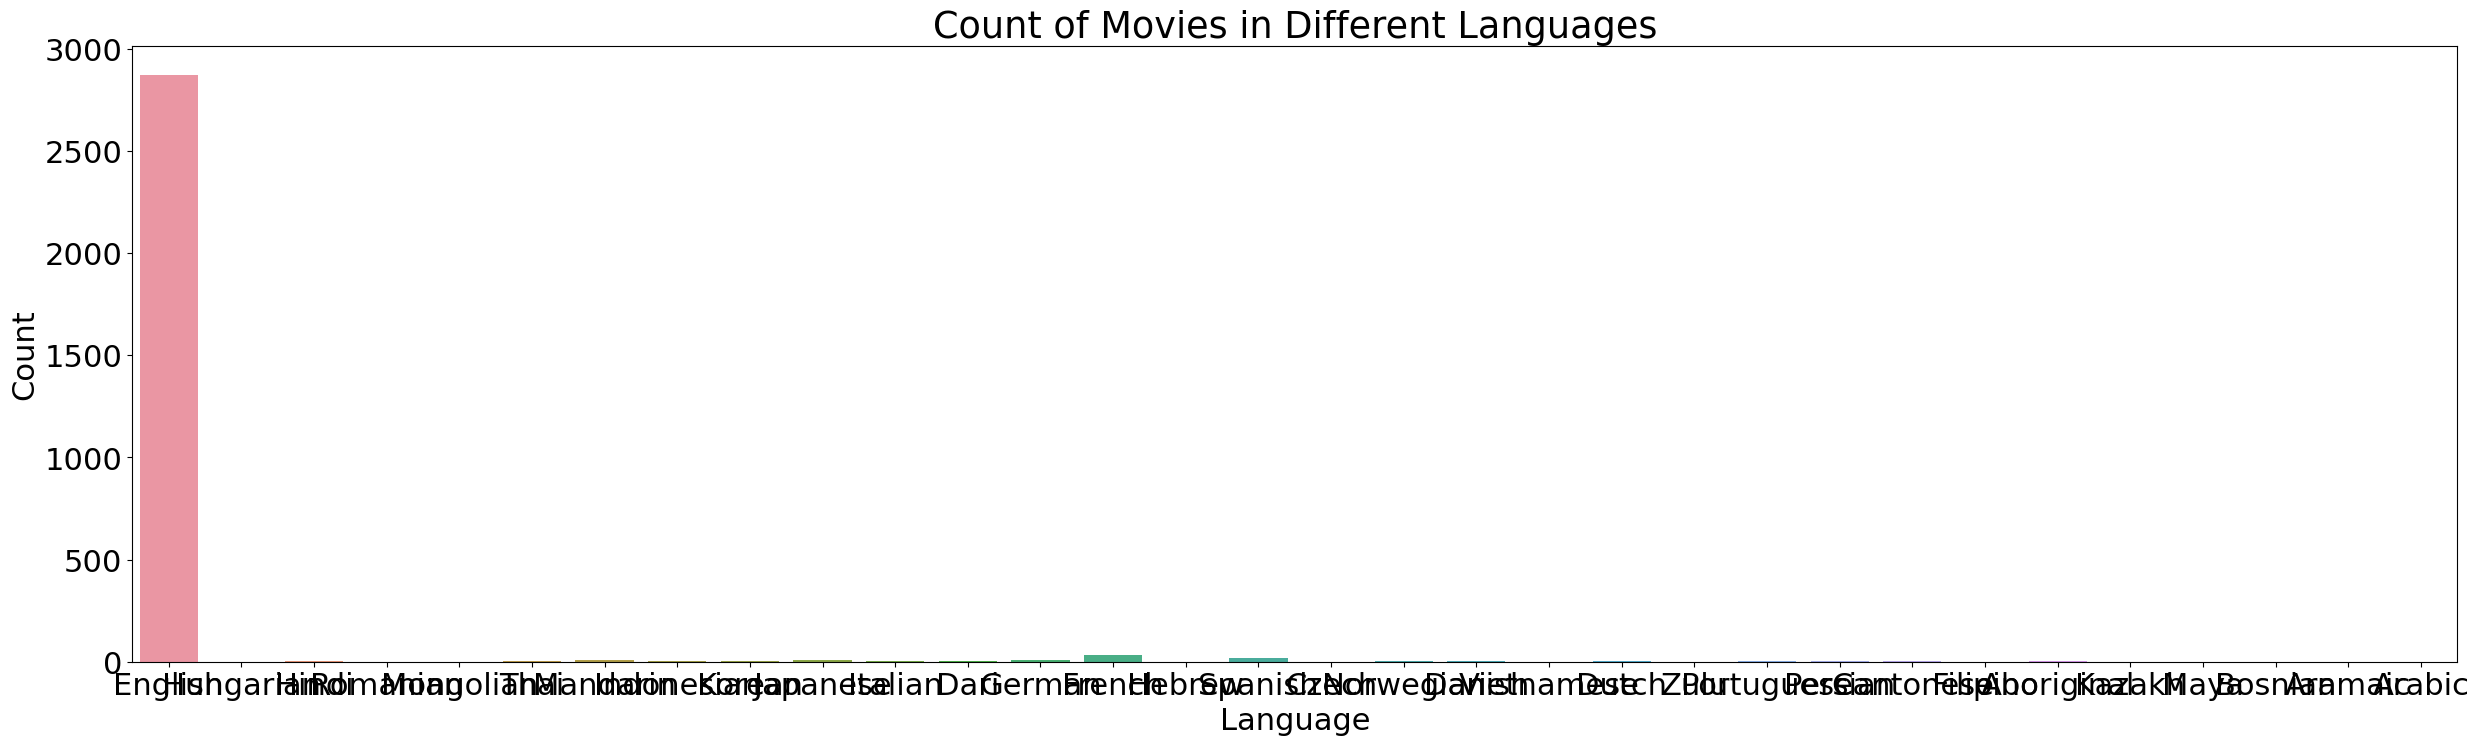

In [93]:
# We will plot language count.
plt.figure(figsize=(30,8))
sns.countplot(x='language', data=dataset)
plt.title('Count of Movies in Different Languages')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()


We can see that most films are in english and there are a lot of unique values, thus we drop the language feature.


In [94]:
# Dropping language column
dataset.drop(columns=['language'], inplace=True)


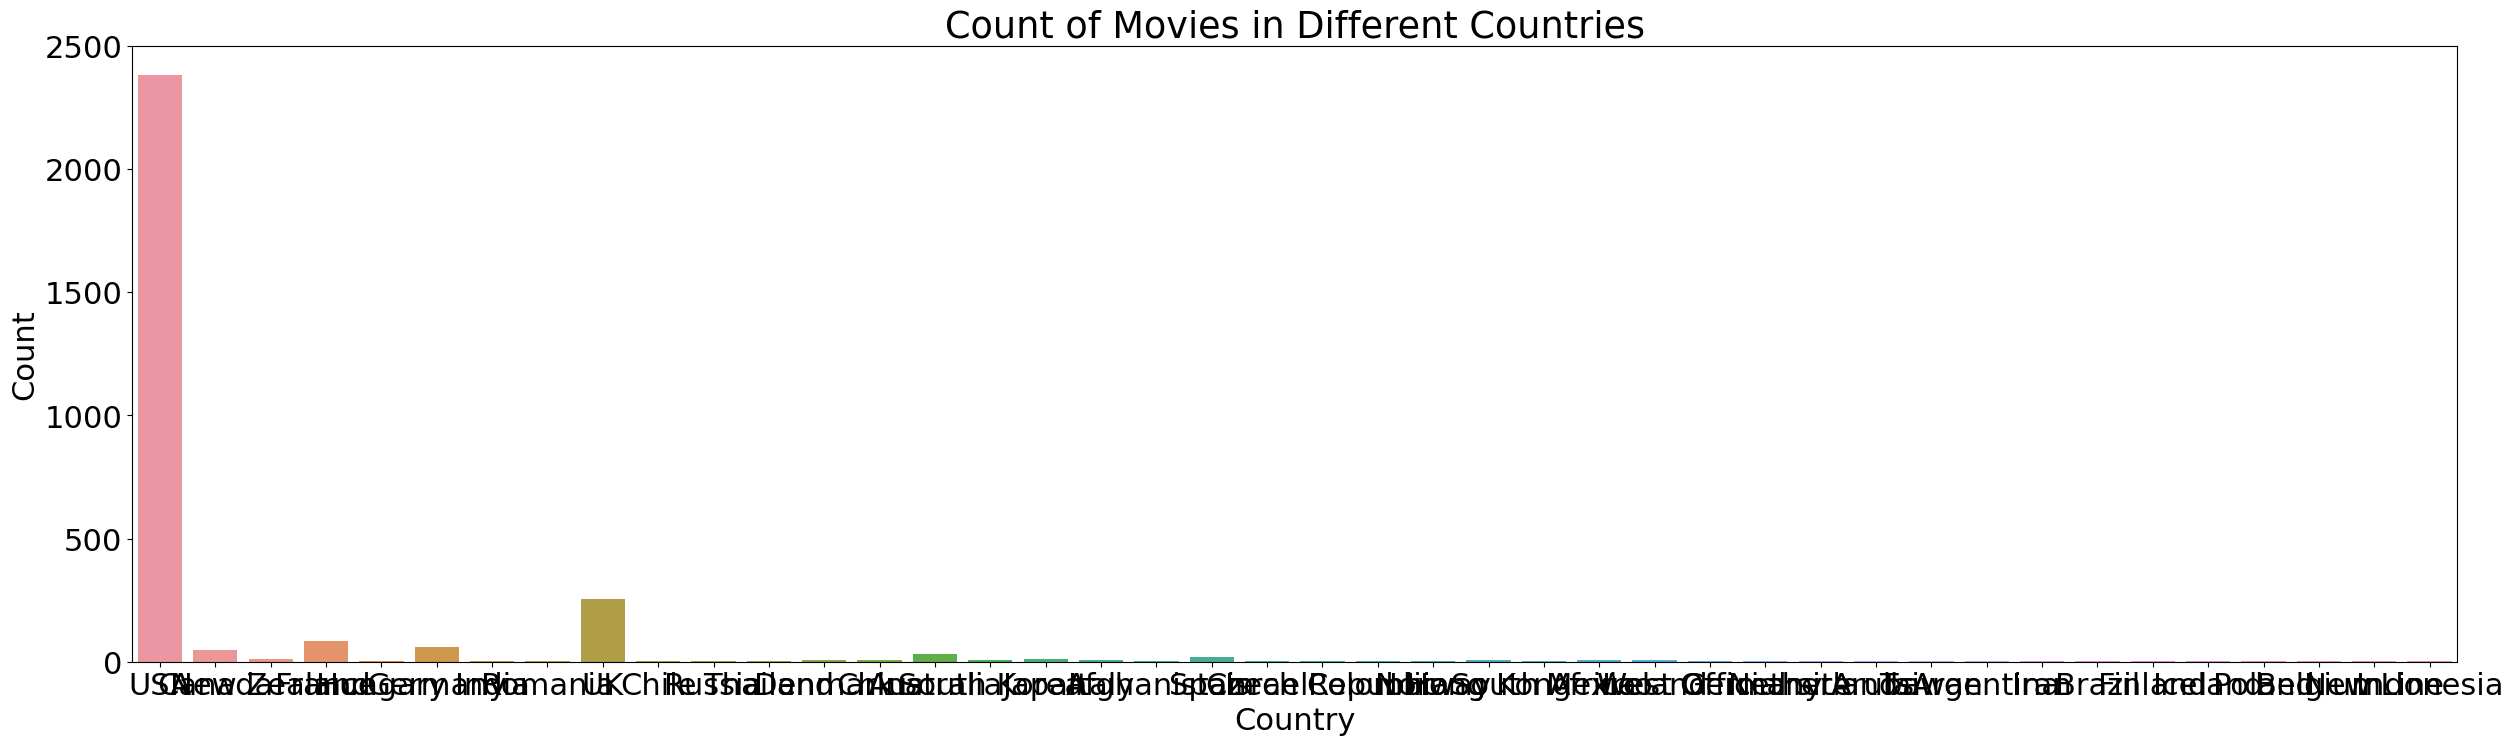

In [95]:
# We will plot country count.
plt.figure(figsize=(30,8))
sns.countplot(x='country', data=dataset)
plt.title('Count of Movies in Different Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()


We can see that most films are made in USA and there are a lot of unique values, thus we drop the country feature.


In [96]:
# Dropping country column
dataset.drop(columns=['country'],inplace=True)


In [97]:
# We will drop the id, director name, actor names, movie title columns, and plot keywords.
dataset.drop(columns=['id', 'director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'movie_title', 'plot_keywords'], inplace=True)


In [98]:
dataset.head()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality,imdb_score_binned,Mystery,History,Adventure,Thriller,Biography,Film-Noir,Drama,Action,Crime,Sport,Family,Animation,Sci-Fi,Comedy,War,Western,Musical,Horror,Music,Romance,Documentary,Fantasy
0,0.168193,-1.692456,-0.251113,0.041616,5.423388,3.576467,-0.246173,-0.659713,G,1994,-0.238016,0.404412,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576,4,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0
1,0.712593,-0.596914,-0.260477,-0.281257,-0.459765,-0.172501,-0.474800,3.162426,R,2005,-0.314785,-0.451986,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0.547624,0.316038,-0.182223,-0.287568,-0.753112,-0.453535,0.110539,0.295821,R,2013,-0.213501,0.102154,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.083775,-0.049143,-0.260477,-0.327532,-0.557017,1.015541,-0.480737,-0.659713,R,1982,-0.393489,0.706670,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726,4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0
4,1.083775,2.781008,-0.260477,0.046874,3.830379,7.517258,0.546387,0.295821,PG-13,2001,0.646659,0.605918,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876,4,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [99]:
# We want to seperate the dataset into features and target
y = dataset['imdb_score_binned']
X = dataset.drop(columns=['imdb_score_binned'])
# We will also store the genres in a separate variable because we want to do stepwise selection for feature selection
genres = X[unique_genres]
X.drop(columns=unique_genres, inplace=True)
X.head()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,content_rating,title_year,actor_2_facebook_likes,movie_facebook_likes,title_embedding,average_degree_centrality
0,0.168193,-1.692456,-0.251113,0.041616,5.423388,3.576467,-0.246173,-0.659713,G,1994,-0.238016,0.404412,[-4.1984697e-03 4.2941985e-03 -1.1961063e-03 ...,0.001576
1,0.712593,-0.596914,-0.260477,-0.281257,-0.459765,-0.172501,-0.474800,3.162426,R,2005,-0.314785,-0.451986,[-4.7586653e-03 2.6511205e-03 -3.7954253e-04 ...,0.000675
2,0.547624,0.316038,-0.182223,-0.287568,-0.753112,-0.453535,0.110539,0.295821,R,2013,-0.213501,0.102154,[ 2.78131524e-03 -3.15494463e-03 -6.38332494e-...,0.003002
3,1.083775,-0.049143,-0.260477,-0.327532,-0.557017,1.015541,-0.480737,-0.659713,R,1982,-0.393489,0.706670,[-5.32674184e-03 3.60742491e-03 7.91795843e-...,0.001726
4,1.083775,2.781008,-0.260477,0.046874,3.830379,7.517258,0.546387,0.295821,PG-13,2001,0.646659,0.605918,[-4.2586620e-03 3.6257182e-03 -1.5326265e-03 ...,0.001876


In [100]:
# We will also drop the content_rating column as most movies are not rated R
X.drop(columns=['content_rating'], inplace=True)


In [101]:
# We will drop title_embedding
X.drop(columns=['title_embedding'], inplace=True)
X.head()


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality
0,0.168193,-1.692456,-0.251113,0.041616,5.423388,3.576467,-0.246173,-0.659713,1994,-0.238016,0.404412,0.001576
1,0.712593,-0.596914,-0.260477,-0.281257,-0.459765,-0.172501,-0.474800,3.162426,2005,-0.314785,-0.451986,0.000675
2,0.547624,0.316038,-0.182223,-0.287568,-0.753112,-0.453535,0.110539,0.295821,2013,-0.213501,0.102154,0.003002
3,1.083775,-0.049143,-0.260477,-0.327532,-0.557017,1.015541,-0.480737,-0.659713,1982,-0.393489,0.706670,0.001726
4,1.083775,2.781008,-0.260477,0.046874,3.830379,7.517258,0.546387,0.295821,2001,0.646659,0.605918,0.001876


In [102]:
# We will drop the actor 3 facebook likes column
X.drop(columns=['actor_3_facebook_likes'], inplace=True)
X.head()


,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,title_year,actor_2_facebook_likes,movie_facebook_likes,average_degree_centrality
0,0.168193,-1.692456,-0.251113,5.423388,3.576467,-0.246173,-0.659713,1994,-0.238016,0.404412,0.001576
1,0.712593,-0.596914,-0.260477,-0.459765,-0.172501,-0.474800,3.162426,2005,-0.314785,-0.451986,0.000675
2,0.547624,0.316038,-0.182223,-0.753112,-0.453535,0.110539,0.295821,2013,-0.213501,0.102154,0.003002
3,1.083775,-0.049143,-0.260477,-0.557017,1.015541,-0.480737,-0.659713,1982,-0.393489,0.706670,0.001726
4,1.083775,2.781008,-0.260477,3.830379,7.517258,0.546387,0.295821,2001,0.646659,0.605918,0.001876


In [103]:
# We will also drop actor 2 facebook likes
X.drop(columns=['actor_2_facebook_likes'], inplace=True)


In [112]:
X

,num_critic_for_reviews,duration,director_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,title_year,movie_facebook_likes,average_degree_centrality
0,0.168193,-1.692456,-0.251113,5.423388,3.576467,-0.246173,-0.659713,1994,0.404412,0.001576
1,0.712593,-0.596914,-0.260477,-0.459765,-0.172501,-0.474800,3.162426,2005,-0.451986,0.000675
2,0.547624,0.316038,-0.182223,-0.753112,-0.453535,0.110539,0.295821,2013,0.102154,0.003002
3,1.083775,-0.049143,-0.260477,-0.557017,1.015541,-0.480737,-0.659713,1982,0.706670,0.001726
4,1.083775,2.781008,-0.260477,3.830379,7.517258,0.546387,0.295821,2001,0.605918,0.001876
...,...,...,...,...,...,...,...,...,...,...
2999,-0.038019,0.863809,-0.246431,0.615219,0.179977,-0.552539,2.684658,2009,0.152531,0.000750
3000,1.875630,0.589924,0.408365,-0.365164,1.377208,1.288052,-0.659713,2013,3.729252,0.003302
3001,0.415648,0.361686,-0.102296,0.313877,0.746381,0.555119,-0.659713,2009,0.605918,0.003302
3002,-0.466940,-0.688209,-0.260477,-0.743041,-0.630845,-0.556880,-0.659713,2007,-0.451986,0.000300


In [111]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


# Assuming X and y are defined elsewhere in your code:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# SVM Model
svm = SVC()
param_grid = {
    'C': [1, 10],  # Regularization parameter
    'gamma': [0.01, 0.001],  # Kernel coefficient for RBF, polynomial and sigmoid
    'kernel': ['linear', 'rbf']  # Type of kernel
}
svm_gs = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose =10, refit=True)
svm_gs.fit(X_train, y_train)


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV 3/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 3/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 2/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 1/3; 2/8] START C=1, gamma=0.01, kernel=rbf.................................
[CV 3/3; 3/8] START C=1, gamma=0.001, kernel=linear.............................
[CV 1/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 2/3; 4/8] START C=1, gamma=0.001, kernel=rbf................................
[CV 2/3; 1/8] START C=1, gamma=0.01, kernel=linear..............................
[CV 3/3; 2/8] END ..C=1, gamma=0.01, kernel=rbf;, score=0.663 total time=   0.7s
[CV 2/3; 3/8] START C=1, gamma=0.001, kernel=linear.............................
[CV 1/3; 3/8] START C=1, gamma=0.001, kernel=linear.............................
[CV 1/3; 5/8] START C=10, gamma=0.01, kernel=line

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10], 'gamma': [0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=10)

In [66]:
# SVM Model
svm = SVC()
param_grid = {
    'C': [1, 10, 100],  # Regularization parameter
    'gamma': [0.01, 0.001, 0.1],  # Kernel coefficient for RBF, polynomial and sigmoid
    'kernel': ['linear', 'rbf']  # Type of kernel
}
svm_gs = GridSearchCV(svm, param_grid, cv=5, n_jobs=-1, verbose =10, refit=True)
svm_gs.fit(X_train, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START C=1, gamma=0.01, kernel=linear.............................
[CV 2/5; 1/18] START C=1, gamma=0.01, kernel=linear.............................
[CV 4/5; 1/18] START C=1, gamma=0.01, kernel=linear.............................
[CV 3/5; 1/18] START C=1, gamma=0.01, kernel=linear.............................
[CV 1/5; 2/18] START C=1, gamma=0.01, kernel=rbf................................
[CV 2/5; 2/18] START C=1, gamma=0.01, kernel=rbf................................
[CV 3/5; 2/18] START C=1, gamma=0.01, kernel=rbf................................
[CV 5/5; 2/18] START C=1, gamma=0.01, kernel=rbf................................
[CV 4/5; 2/18] START C=1, gamma=0.01, kernel=rbf................................
[CV 5/5; 1/18] START C=1, gamma=0.01, kernel=linear.............................
[CV 1/5; 3/18] START C=1, gamma=0.001, kernel=linear............................
[CV 2/5; 3/18] START C=1, gamma=0.001, kernel=li

KeyboardInterrupt: 

In [116]:
svm_best = svm_gs.best_estimator_
# Printing parameters for the best estimator including kernel)
print(svm_gs.best_params_)
y_pred_svm = svm_best.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy}')


{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
SVM Accuracy: 0.6905158069883528


In [117]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Doing feature selection with the best SVM model
sffs = SFS(svm_best, 
           k_features='best', 
           forward=True, 
           floating=False, 
           cv=None)
sffs = sffs.fit(X, y)
sffs.subsets_


{1: {'feature_idx': (4,),
  'cv_scores': array([0.65146471]),
  'avg_score': 0.6514647137150466,
  'feature_names': ('num_voted_users',)},
 2: {'feature_idx': (3, 4),
  'cv_scores': array([0.67043941]),
  'avg_score': 0.670439414114514,
  'feature_names': ('gross', 'num_voted_users')},
 3: {'feature_idx': (3, 4, 7),
  'cv_scores': array([0.69573901]),
  'avg_score': 0.6957390146471372,
  'feature_names': ('gross', 'num_voted_users', 'title_year')},
 4: {'feature_idx': (1, 3, 4, 7),
  'cv_scores': array([0.70306258]),
  'avg_score': 0.7030625832223701,
  'feature_names': ('duration', 'gross', 'num_voted_users', 'title_year')},
 5: {'feature_idx': (1, 3, 4, 7, 8),
  'cv_scores': array([0.7087217]),
  'avg_score': 0.7087217043941412,
  'feature_names': ('duration',
   'gross',
   'num_voted_users',
   'title_year',
   'movie_facebook_likes')},
 6: {'feature_idx': (0, 1, 3, 4, 7, 8),
  'cv_scores': array([0.71438083]),
  'avg_score': 0.7143808255659121,
  'feature_names': ('num_critic_for_

In [118]:
# We will now get the subset with the highest cv_score and the lowest index as we are doing forward selection.
best_subset = sffs.subsets_[max(sffs.subsets_, key=lambda k: sffs.subsets_[k]['avg_score'])]
# Now we get the feature names
best_feature_names_svm = list(best_subset['feature_names'])
best_feature_names_svm


['num_critic_for_reviews',
 'duration',
 'director_facebook_likes',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster',
 'title_year',
 'movie_facebook_likes']

In [123]:
# Now checking accuracy with the best features
svm_best.fit(X_train[best_feature_names_svm], y_train)
y_pred_svm_ft = svm_best.predict(X_test[best_feature_names_svm])
svm_accuracy_ft = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy with selected features:', svm_accuracy_ft)
print('SVM Accuracy:', svm_accuracy)


SVM Accuracy with selected features: 1.0
SVM Accuracy: 0.6905158069883528


In [125]:
# Logistic Regression Model
logr = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Types of penalties
    'solver': ['saga'],  # Solvers
    'max_iter': [100,200,1000]  # Number of iterations
}
logr_gs = GridSearchCV(logr, param_grid, cv=3, n_jobs=-1, refit = True)
logr_gs.fit(X_train, y_train)


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/softwar

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['saga']})

In [126]:
logr_best = logr_gs.best_estimator_
y_pred_logr = logr_best.predict(X_test)
logr_accuracy = accuracy_score(y_test, y_pred_logr)
print('Logistic Regression Best Parameters:', logr_gs.best_params_)
print('Logistic Regression Accuracy:', logr_accuracy)


Logistic Regression Best Parameters: {'C': 0.1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'saga'}
Logistic Regression Accuracy: 0.6339434276206323


In [127]:
# Doing feature selection with the best logr model
sffs = SFS(logr_best, 
           k_features='best', 
           forward=True, 
           floating=False, 
           cv=None)
sffs = sffs.fit(X, y)
sffs.subsets_


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/taherm/softwar

{1: {'feature_idx': (4,),
  'cv_scores': array([0.66078562]),
  'avg_score': 0.6607856191744341,
  'feature_names': ('num_voted_users',)},
 2: {'feature_idx': (3, 4),
  'cv_scores': array([0.67743009]),
  'avg_score': 0.6774300932090546,
  'feature_names': ('gross', 'num_voted_users')},
 3: {'feature_idx': (0, 3, 4),
  'cv_scores': array([0.67842876]),
  'avg_score': 0.6784287616511319,
  'feature_names': ('num_critic_for_reviews', 'gross', 'num_voted_users')},
 4: {'feature_idx': (0, 1, 3, 4),
  'cv_scores': array([0.68009321]),
  'avg_score': 0.6800932090545939,
  'feature_names': ('num_critic_for_reviews',
   'duration',
   'gross',
   'num_voted_users')},
 5: {'feature_idx': (0, 1, 3, 4, 5),
  'cv_scores': array([0.6804261]),
  'avg_score': 0.6804260985352862,
  'feature_names': ('num_critic_for_reviews',
   'duration',
   'gross',
   'num_voted_users',
   'cast_total_facebook_likes')},
 6: {'feature_idx': (0, 1, 3, 4, 5, 6),
  'cv_scores': array([0.68308921]),
  'avg_score': 0.683

In [129]:
# We will now get the subset with the highest cv_score and the lowest index as we are doing forward selection.
best_subset = sffs.subsets_[max(sffs.subsets_, key=lambda k: sffs.subsets_[k]['avg_score'])]
# Now we get the feature names
best_feature_names_logr = list(best_subset['feature_names'])
best_feature_names_logr


['num_critic_for_reviews',
 'duration',
 'gross',
 'num_voted_users',
 'cast_total_facebook_likes',
 'facenumber_in_poster']

In [ ]:
X_train[best_feature_names_logr].head()


,num_critic_for_reviews,duration,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster
820,-1.011340,-0.642561,-0.620383,-0.603006,-0.518759,0.295821
1722,-0.285473,-0.551266,-0.370539,-0.364483,-0.400903,-0.659713
2913,-0.409201,-0.916447,-0.694790,-0.606838,-0.435631,2.684658
1983,-0.755637,-0.094790,-0.757825,-0.587426,-0.462675,-0.181946
686,0.861066,-1.099037,-0.493702,-0.346476,-0.435431,-0.659713


In [ ]:
# Now checking accuracy with the best features
logr_best.fit(X_train[best_feature_names_logr], y_train)
y_pred_logr_ft = logr_best.predict(X_test[best_feature_names_logr])
logr_accuracy_ft = accuracy_score(y_test, y_pred_logr)
print('Logistic Regression Accuracy with selected features:', logr_accuracy_ft)
print('Logistic Regression Accuracy:', logr_accuracy)


Logistic Regression Accuracy with selected features: 0.6289517470881864
Logistic Regression Accuracy: 0.6289517470881864


Thus, feature selection is the same as l2 error as the dataset was overfitted.


In [ ]:
# We will make a random forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
rf_gs = GridSearchCV(rf, params_rf, cv=3, n_jobs=-1)
rf_gs.fit(X_train, y_train)
rf_best = rf_gs.best_estimator_
y_pred_rf = rf_best.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy:', rf_accuracy)


Random Forest Accuracy: 0.7221297836938436


In [ ]:
# We haven't used the genres, plot keywords and actor/director names yet. We will add them to our models to see if they improve accuracy.
X_genres = pd.concat([X, genres], axis=1)
# Adding genres to training set
X_train_genres = pd.concat([X_train, genres.iloc[X_train.index]], axis=1)
# Adding genres to test set
X_test_genres = pd.concat([X_test, genres.iloc[X_test.index]], axis=1)
# SVM Model
svm_best.fit(X_train_genres, y_train)
y_pred_svm = svm_best.predict(X_test_genres)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy with Genres:', svm_accuracy)


SVM Accuracy with Genres: 0.7487520798668885


In [ ]:
# Logistic Regression Model
logr_best.fit(X_train_genres, y_train)
y_pred_logr = logr_best.predict(X_test_genres)
logr_accuracy = accuracy_score(y_test, y_pred_logr)
print('Logistic Regression Accuracy with Genres:', logr_accuracy)


Logistic Regression Accuracy with Genres: 0.6306156405990017


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# Random Forest Model
rf_best.fit(X_train_genres, y_train)
y_pred_rf = rf_best.predict(X_test_genres)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy with Genres:', rf_accuracy)


Random Forest Accuracy with Genres: 0.7537437603993344


In [ ]:
# We are boosting the models with xgboost
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_genres, y_train)
y_pred_xgb = xgb_model.predict(X_test_genres)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
print('XGBoost Accuracy with Genres:', xgb_accuracy)


XGBoost Accuracy with Genres: 0.7587354409317804


In [ ]:
# Building an ensemble model with light GBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_genres, y_train)
y_pred_lgb = lgb_model.predict(X_test_genres)
lgb_accuracy = accuracy_score(y_test, y_pred_lgb)
print('Light GBM Accuracy with Genres:', lgb_accuracy)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1793
[LightGBM] [Info] Number of data points in the train set: 2403, number of used features: 31
[LightGBM] [Info] Start training from score -4.894101
[LightGBM] [Info] Start training from score -2.553365
[LightGBM] [Info] Start training from score -0.492817
[LightGBM] [Info] Start training from score -1.351533
[LightGBM] [Info] Start training from score -3.102342
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Light GBM Accuracy with Genres: 0.762063227953411


In [ ]:
print(dataset)

      num_critic_for_reviews  duration  director_facebook_likes  \
0                   0.168193 -1.692456                -0.251113   
1                   0.712593 -0.596914                -0.260477   
2                   0.547624  0.316038                -0.182223   
3                   1.083775 -0.049143                -0.260477   
4                   1.083775  2.781008                -0.260477   
...                      ...       ...                      ...   
2999               -0.038019  0.863809                -0.246431   
3000                1.875630  0.589924                 0.408365   
3001                0.415648  0.361686                -0.102296   
3002               -0.466940 -0.688209                -0.260477   
3003               -1.027837  0.224743                -0.127043   

      actor_3_facebook_likes     gross  num_voted_users  \
0                   0.041616  5.423388         3.576467   
1                  -0.281257 -0.459765        -0.172501   
2                 

In [ ]:
# We will do stacking on rf_best, svm_best, lgb_model
from sklearn.ensemble import StackingClassifier
estimators = [('rf', rf_best), ('svm', svm_best), ('logr', logr_best)]
stack = StackingClassifier(estimators=estimators, final_estimator=rf_best)
stack.fit(X_train_genres, y_train)
y_pred_stack = stack.predict(X_test_genres)
stack_accuracy = accuracy_score(y_test, y_pred_stack)
print('Stacking Accuracy:', stack_accuracy)


/home/taherm/software/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


KeyboardInterrupt: 

In [ ]:
X_train_genres.head()
# Trying to scale average degree of centrality to see if it improves accuracy
X_train_genres['average_degree_centrality'] = scaler.fit_transform(X_train_genres[['average_degree_centrality']])
# Seeing if SVM improves
svm_best.fit(X_train_genres, y_train)
y_pred_svm_sc = svm_best.predict(X_test_genres)
svm_accuracy_sc = accuracy_score(y_test, y_pred_svm)
print('SVM Accuracy with Genres and Scaled Average Degree Centrality:', svm_accuracy_sc)
print('SVM Accuracy with Genres:', svm_accuracy)

# Seeing if Logistic Regression improves
logr.fit(X_train_genres, y_train)
y_pred_logr_sc = logr.predict(X_test_genres)
logr_accuracy_sc = accuracy_score(y_test, y_pred_logr)
print('Logistic Regression Accuracy with Genres and Scaled Average Degree Centrality:', logr_accuracy_sc)
print('Logistic Regression Accuracy with Genres:', logr_accuracy)

# Seeing if Random Forest improves
rf_best.fit(X_train_genres, y_train)
y_pred_rf_sc = rf_best.predict(X_test_genres)
rf_accuracy_sc = accuracy_score(y_test, y_pred_rf)
print('Random Forest Accuracy with Genres and Scaled Average Degree Centrality:', rf_accuracy_sc)
print('Random Forest Accuracy with Genres:', rf_accuracy)


We can see that scaling average degree of centrality is not changing the accuracy.


In [ ]:
# Trying to boost the stack model with ada boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(estimator=stack, n_estimators=20)
ada.fit(X_train_genres, y_train)
y_pred_ada = ada.predict(X_test_genres)
ada_accuracy = accuracy_score(y_test, y_pred_ada)
print(f'Ada Boost Accuracy:{ada_accuracy}')


In [ ]:
# Implementing k-fold cross validation
from sklearn.model_selection import cross_val_score
# SVM
svm_cv = cross_val_score(svm_best, X_genres, y, cv=5)
print(f'SVM CV Scores: {svm_cv}')
print(f'SVM CV Mean Score: {svm_cv.mean()}')
# Logistic Regression
logr_cv = cross_val_score(logr_best, X_genres, y, cv=5)
print(f'Logistic Regression CV Scores: {logr_cv}')
print(f'Logistic Regression CV Mean Score: {logr_cv.mean()}')
# Random Forest
rf_cv = cross_val_score(rf_best, X_genres, y, cv=5)
print(f'Random Forest CV Scores: {rf_cv}')
print(f'Random Forest CV Mean Score: {rf_cv.mean()}')
# XGBoost
xgb_cv = cross_val_score(xgb_model, X_genres, y, cv=5)
print(f'XGBoost CV Scores: {xgb_cv}')
print(f'XGBoost CV Mean Score: {xgb_cv.mean()}')
# Light GBM
lgb_cv = cross_val_score(lgb_model, X_genres, y, cv=5)
print(f'Light GBM CV Scores: {lgb_cv}')
print(f'Light GBM CV Mean Score: {lgb_cv.mean()}')
# Stacking
stack_cv = cross_val_score(stack, X_genres, y, cv=5)
print(f'Stacking CV Scores: {stack_cv}')
print(f'Stacking CV Mean Score: {stack_cv.mean()}')
# Ada Boost
ada_cv = cross_val_score(ada, X_genres, y, cv=5)
print(f'Ada Boost CV Scores: {ada_cv}')
print(f'Ada Boost CV Mean Score: {ada_cv.mean()}')


In [ ]:
print(f'The scores ranked from highest to lowest with labels are: {sorted([(svm_cv.mean(), "SVM"), (logr_cv.mean(), "Logistic Regression"), (rf_cv.mean(), "Random Forest"), (xgb_cv.mean(), "XGBoost"), (lgb_cv.mean(), "Light GBM"), (stack_cv.mean(), "Stacking"), (ada_cv.mean(), "Ada Boost")], key=lambda x: x[0], reverse=True)}')


In [ ]:
# Checking the distribution of training dataset using value counts
y_train.value_counts()


In [ ]:
# We will use SMOTE to balance only the training dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_train_smote, y_train_smote = smote.fit_resample(X_train_genres, y_train)
y_train_smote.value_counts()


In [ ]:

# SVM Model
# Note that the computation time for SVM will be very high because the dataset is large.
# Since we are using SMOTE, the dataset is even larger. Similarly, the complexity of data is higher so we use only rbf as kernel.
svm = SVC()
param_grid = {
    'C': [1, 10],  # Regularization parameter
    'gamma': [0.01, 0.001],  # Kernel coefficient for RBF, polynomial and sigmoid
    'kernel': ['rbf']  # Type of kernel
}
svm_smote_gs = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, verbose =10, refit=True)
svm_smote_gs.fit(X_train_smote, y_train_smote)


In [ ]:
svm_smote_best = svm_smote_gs.best_estimator_
# Printing parameters
print(svm_smote_gs.best_params_)
y_pred_svm_smote = svm_smote_best.predict(X_test_genres)
svm_smote_accuracy = accuracy_score(y_test, y_pred_svm_smote)
print(f'SVM Accuracy with SMOTE: {svm_smote_accuracy}')


In [ ]:
# Logistic Regression Model
logr = LogisticRegression()
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Types of penalties
    'solver': ['saga'],  # Solvers
    'max_iter': [100,200,1000]  # Number of iterations
}
logr_smote_gs = GridSearchCV(logr, param_grid, cv=3, n_jobs=-1, refit = True)
logr_smote_gs.fit(X_train_smote, y_train_smote)


In [ ]:
logr_smote_best = logr_smote_gs.best_estimator_
# Printing parameters
print(logr_smote_gs.best_params_)
y_pred_logr_smote = logr_smote_best.predict(X_test_genres)
logr_smote_accuracy = accuracy_score(y_test, y_pred_logr_smote)
print(f'Logical Regression Accuracy with SMOTE: {logr_smote_accuracy}')


Logistical Regression does not give good results with smote, due to it being a linear model. SMOTE introduces new complexities in the data and thus a linear model is not able to capture the complexity. Thus, we will not include this in the stacking model.


In [ ]:
# We will make a random forest model
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [10, 20, 30]}
rf_smote_gs = GridSearchCV(rf, params_rf, cv=3, n_jobs=-1)
rf_smote_gs.fit(X_train_smote, y_train_smote)


In [ ]:
rf_smote_best = rf_smote_gs.best_estimator_
# Printing parameters
print(rf_smote_gs.best_params_)
y_pred_rf_smote = rf_smote_best.predict(X_test_genres)
rf_smote_accuracy = accuracy_score(y_test, y_pred_rf_smote)
print(f'Random Forest Accuracy with SMOTE: {rf_smote_accuracy}')


In [ ]:
# Light GBM model
lgb_smote_model = lgb.LGBMClassifier()
lgb_smote_model.fit(X_train_smote, y_train_smote)
y_pred_lgb_smote = lgb_smote_model.predict(X_test_genres)
lgb_smote_accuracy = accuracy_score(y_test, y_pred_lgb_smote)
print(f'Light GBM Accuracy with SMOTE: {lgb_smote_accuracy}')


In [ ]:
# Stacking model using rf_smote_best, svm_smote_best
estimators = [('rf', rf_smote_best), ('svm', svm_smote_best)]
stack_smote = StackingClassifier(estimators=estimators, final_estimator=rf_smote_best)
stack_smote.fit(X_train_smote, y_train_smote)
y_pred_stack_smote = stack_smote.predict(X_test_genres)
stack_smote_accuracy = accuracy_score(y_test, y_pred_stack_smote)
print(f'Stacking Accuracy with SMOTE: {stack_smote_accuracy}')


In [ ]:
# Boosting the stacked model using ada boost
ada_smote = AdaBoostClassifier(estimator=stack_smote, n_estimators=20)
ada_smote.fit(X_train_smote, y_train_smote)
y_pred_ada_smote = ada_smote.predict(X_test_genres)
ada_smote_accuracy = accuracy_score(y_test, y_pred_ada_smote)
print(f'Ada Boost Accuracy with SMOTE: {ada_smote_accuracy}')


In [ ]:
# Doing cross validation with SMOTE
# SVM
svm_smote_cv = cross_val_score(svm_smote_best, X_genres, y, cv=5)
print(f'SVM CV Scores with SMOTE: {svm_smote_cv}')
print(f'SVM CV Mean Score with SMOTE: {svm_smote_cv.mean()}')
# Logistic Regression
logr_smote_cv = cross_val_score(logr_smote_best, X_genres, y, cv=5)
print(f'Logistic Regression CV Scores with SMOTE: {logr_smote_cv}')
print(f'Logistic Regression CV Mean Score with SMOTE: {logr_smote_cv.mean()}')
# Random Forest
rf_smote_cv = cross_val_score(rf_smote_best, X_genres, y, cv=5)
print(f'Random Forest CV Scores with SMOTE: {rf_smote_cv}')
print(f'Random Forest CV Mean Score with SMOTE: {rf_smote_cv.mean()}')
# Light GBM
lgb_smote_cv = cross_val_score(lgb_smote_model, X_genres, y, cv=5)
print(f'Light GBM CV Scores with SMOTE: {lgb_smote_cv}')
print(f'Light GBM CV Mean Score with SMOTE: {lgb_smote_cv.mean()}')
# Stacking
stack_smote_cv = cross_val_score(stack_smote, X_genres, y, cv=5)
print(f'Stacking CV Scores with SMOTE: {stack_smote_cv}')
print(f'Stacking CV Mean Score with SMOTE: {stack_smote_cv.mean()}')
# Ada Boost
ada_smote_cv = cross_val_score(ada_smote, X_genres, y, cv=5)
print(f'Ada Boost CV Scores with SMOTE: {ada_smote_cv}')
print(f'Ada Boost CV Mean Score with SMOTE: {ada_smote_cv.mean()}')


In [ ]:
print(f'The scores ranked from highest to lowest with labels with SMOTE are: {sorted([(svm_smote_cv.mean(), "SVM SMOTE"), (logr_smote_cv.mean(), "Logistic Regression SMOTE"), (rf_smote_cv.mean(), "Random Forest SMOTE"), (lgb_smote_cv.mean(), "Light GBM SMOTE"), (stack_smote_cv.mean(), "Stacking SMOTE"), (ada_smote_cv.mean(), "Ada Boost SMOTE")], key=lambda x: x[0], reverse=True)}')


In [ ]:
print(f'The model with the best cv score with or without SMOTE is: {sorted([(svm_smote_cv.mean(), "SVM SMOTE"), (logr_smote_cv.mean(), "Logistic Regression SMOTE"), (rf_smote_cv.mean(), "Random Forest SMOTE"), (lgb_smote_cv.mean(), "Light GBM SMOTE"), (stack_smote_cv.mean(), "Stacking SMOTE"), (ada_smote_cv.mean(), "Ada Boost SMOTE"),(svm_cv.mean(), "SVM"), (logr_cv.mean(), "Logistic Regression"), (rf_cv.mean(), "Random Forest"), (xgb_cv.mean(), "XGBoost"), (lgb_cv.mean(), "Light GBM"), (stack_cv.mean(), "Stacking"), (ada_cv.mean(), "Ada Boost")], key=lambda x: x[0], reverse=True)}')


LightGBM seems to be the most accurate model so we will use this as the model we try to maximise accuracy for.


In [ ]:
X_train.head()


In [ ]:
# We will now see if genres added any value to the model
lgbm_no_genres = lgb.LGBMClassifier()
lgbm_no_genres.fit(X_train, y_train)
# cross validation without genres
lgb_cv_no_genres = cross_val_score(lgbm_no_genres, X, y, cv=5)
# Light GBM
lgb_cv = cross_val_score(lgb_model, X_genres, y, cv=5)


In [ ]:
print(f'Light GBM CV Scores without Genres: {lgb_cv_no_genres.mean()}')
print(f'Light GBM CV Mean Score: {lgb_cv.mean()}')


In [ ]:
# We load plot keywords doc2vec data
doc2vec_plot_data = np.load('data/features_doc2vec/train_doc2vec_features_plot_keywords.npy')
doc2vec_plot_data.shape
# We will add doc2vec plot keywords to X_genres
X_genres_plot = pd.concat([X_genres, pd.DataFrame(doc2vec_plot_data)], axis=1)
X_genres_plot.head()
# Also adding to X_train_genres, X_test_genres
X_train_genres_plot = pd.concat([X_train_genres, pd.DataFrame(doc2vec_plot_data[X_train_genres.index])], axis=1)
X_test_genres_plot = pd.concat([X_test_genres, pd.DataFrame(doc2vec_plot_data[X_test_genres.index])], axis=1)


In [ ]:
# We will now see if plot keywords added any value to the model
lgbm_plot = lgb.LGBMClassifier()
lgbm_plot.fit(X_train_genres, y_train)
# cross validation with plot keywords
lgb_cv_plot = cross_val_score(lgbm_plot, X_genres_plot, y, cv=5)
print(f'Light GBM CV Mean Score with Plot Keywords: {lgb_cv_plot.mean()}')
print(f'Light GBM CV Mean Score with Genres: {lgb_cv.mean()}')


In [ ]:
# We will now load the doc2vec genres and try adding them to X and see if they improve cv score
doc2vec_genres_data = np.load('data/features_doc2vec/train_doc2vec_features_genre.npy')
# Adding doc2vec genres to X
X_d2v_genres = pd.concat([X, pd.DataFrame(doc2vec_genres_data)], axis=1)
# Adding doc2vec genres to X_train_genres, X_test_genres
X_train_d2v_genres = pd.concat([X_train_genres, pd.DataFrame(doc2vec_genres_data[X_train_genres.index])], axis=1)
X_test_d2v_genres = pd.concat([X_test_genres, pd.DataFrame(doc2vec_genres_data[X_test_genres.index])], axis=1)
# We will now see if doc2vec genres added any value to the model
lgbm_d2v_genres = lgb.LGBMClassifier()
lgbm_d2v_genres.fit(X_train_genres, y_train)
# cross validation with doc2vec genres
lgb_cv_d2v_genres = cross_val_score(lgbm_d2v_genres, X_d2v_genres, y, cv=5)
print(f'Light GBM CV Mean Score with Doc2Vec Genres: {lgb_cv_d2v_genres.mean()}')
print(f'Light GBM CV Mean Score with Genres: {lgb_cv.mean()}')


In [ ]:
# We will now load countvec director names and try adding them to X_genres and see if they improve cv score
countvec_director_data = np.load('data/features_countvec/train_countvec_features_director_name.npy')
countvec_director_data = pd.DataFrame(countvec_director_data)
countvec_director_data.shape()


In [ ]:
# Adding countvec director names to X_genres
X_genres_director = pd.concat([X_genres, pd.DataFrame(countvec_director_data)], axis=1)
# Adding countvec director names to X_train_genres, X_test_genres
X_train_genres_director = pd.concat([X_train_genres, pd.DataFrame(countvec_director_data[X_train_genres.index])], axis=1)
X_test_genres_director = pd.concat([X_test_genres, pd.DataFrame(countvec_director_data[X_test_genres.index])], axis=1)
# We will now see if countvec director names added any value to the model
lgbm_director = lgb.LGBMClassifier()
lgbm_director.fit(X_train_genres, y_train)
# cross validation with countvec director names
lgb_cv_director = cross_val_score(lgbm_director, X_genres_director, y, cv=5)
print(f'Light GBM CV Mean Score with CountVec Director Names: {lgb_cv_director.mean()}')
print(f'Light GBM CV Mean Score with Genres: {lgb_cv.mean()}')
